# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

Mounting drive

In [2]:
from google.colab import drive

#Parameters for mounting
mount_path = '/content/drive'
drive_path = '/content/drive/MyDrive'
data_path = '/content/drive/MyDrive/Term2 Fall2021/Research Methodology Comp Sci/Dataset and Code'
path = data_path + '/processed.cleveland.data'
#cleveland_data_path = data_path + '/Cleveland.csv'
cleveland_data_path = data_path + '/heart.csv'
#Mount drive to access files in drive
drive.mount(mount_path, force_remount = True)

Mounted at /content/drive


# Preprocessing

**General Information**
1. Age
2. Sex: 1-Male; 0-Female
3. Chest Pain Type: 1-typical angina; 2-atypical angina; 3-non-anginal pain; 4-asymptotic
4. Resting blood pressure
5. serum cholestrol
6. fasting blood sugar: if>120 - 1; else - 0
7. Resting ECG: 0-normal; 1-having ST-T wave abnormality; 2-left ventricula hypertrophy
8. max heart rate acheived
9. Excercise induced angina: 1-Yes; 0-No
10. ST depression induced by exercise relative to rest
11. Peak exercise ST segment: 1-upsloping; 2-flat; 3-downsloping
12. number of major vessels (0-3) colored by flourosopy
13. Thalassemia: 3-normal; 6-fixed defect; 7-reversible defect
14. diagnosis of heart disease: 0-absence; 1,2,3,4-present


## Data Reduction

In [3]:
df = pd.read_csv(cleveland_data_path)
df.columns = ['age', 'sex', 'chestPainType', 'restingBP', 'serumCholestrol',
              'fastingBP', 'restingECG', 'heartRateMax', 'exerciseIndAngina', 
              'STDepression', 'peakExerST', 'numberMajorVessels', 'thalassemia', 'diagnosis']

In [4]:
df = df.sample(frac = 1)
df

,age,sex,chestPainType,restingBP,serumCholestrol,fastingBP,restingECG,heartRateMax,exerciseIndAngina,STDepression,peakExerST,numberMajorVessels,thalassemia,diagnosis
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1


## Data Cleaning

In [5]:
df.isna().sum()

age                   0
sex                   0
chestPainType         0
restingBP             0
serumCholestrol       0
fastingBP             0
restingECG            0
heartRateMax          0
exerciseIndAngina     0
STDepression          0
peakExerST            0
numberMajorVessels    0
thalassemia           0
diagnosis             0
dtype: int64

## Data Augmentation

In [6]:
#Renaming data according to values
df['diagnosis'] = df.diagnosis.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [7]:
df

,age,sex,chestPainType,restingBP,serumCholestrol,fastingBP,restingECG,heartRateMax,exerciseIndAngina,STDepression,peakExerST,numberMajorVessels,thalassemia,diagnosis
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1


In [8]:
#user defined normalization function
def normalize(data):
  minVal = min(data)
  maxVal = max(data)

  norm = []

  for i in data:
    j = (i - minVal)/(maxVal - minVal)
    norm.append(j)
  return norm

In [9]:
age = normalize(df['age'])
sex = df['sex']
cp = normalize(df['chestPainType'])
trestbps = normalize(df['restingBP'])
chol = normalize(df['serumCholestrol'])
fbs = df['fastingBP']
restecg = df['restingECG']
thalach = normalize(df['heartRateMax'])
exang = df['exerciseIndAngina']
oldpeak = normalize(df['STDepression'])
slope = normalize(df['peakExerST'])
ca = normalize(df['numberMajorVessels'])
thal = normalize(df['thalassemia'])
target = df['diagnosis']

In [10]:
#creating normamlized dataset
dataset = np.hstack((
    np.vstack((age)),
    np.vstack((sex)),
    np.vstack((cp)),
    np.vstack((trestbps)),
    np.vstack((chol)),
    np.vstack((fbs)),
    np.vstack((restecg)),
    np.vstack((thalach)),
    np.vstack((exang)),
    np.vstack((oldpeak)),
    np.vstack((slope)),
    np.vstack((ca)),
    np.vstack((thal)),
    np.vstack((target))
))

In [11]:
df = pd.DataFrame(dataset, columns = ['age', 'sex', 'chestPainType', 'restingBP', 'serumCholestrol',
              'fastingBP', 'restingECG', 'heartRateMax', 'exerciseIndAngina', 
              'STDepression', 'peakExerST', 'numberMajorVessels', 'thalassemia', 'diagnosis'])
df

,age,sex,chestPainType,restingBP,serumCholestrol,fastingBP,restingECG,heartRateMax,exerciseIndAngina,STDepression,peakExerST,numberMajorVessels,thalassemia,diagnosis
0,0.520833,0.0,0.666667,0.150943,0.200913,0.0,1.0,0.664122,0.0,0.258065,0.5,0.00,0.666667,1.0
1,0.687500,0.0,0.000000,0.528302,0.269406,0.0,1.0,0.633588,1.0,0.225806,0.5,0.00,0.666667,0.0
2,0.791667,1.0,0.000000,0.622642,0.365297,0.0,0.0,0.282443,1.0,0.241935,0.5,0.75,0.666667,0.0
3,0.604167,0.0,0.666667,0.245283,0.488584,0.0,1.0,0.770992,0.0,0.000000,1.0,0.00,0.666667,1.0
4,0.250000,1.0,0.000000,0.150943,0.105023,0.0,0.0,0.664122,0.0,0.000000,1.0,0.00,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.562500,1.0,0.000000,0.358491,0.132420,0.0,0.0,0.259542,1.0,0.338710,0.5,0.25,0.333333,0.0
299,0.583333,1.0,0.333333,0.283019,0.308219,0.0,1.0,0.534351,0.0,0.048387,1.0,0.00,1.000000,0.0
300,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
301,0.354167,1.0,0.333333,0.066038,0.162100,1.0,1.0,0.648855,0.0,0.000000,1.0,0.00,1.000000,1.0


# Feature Selection

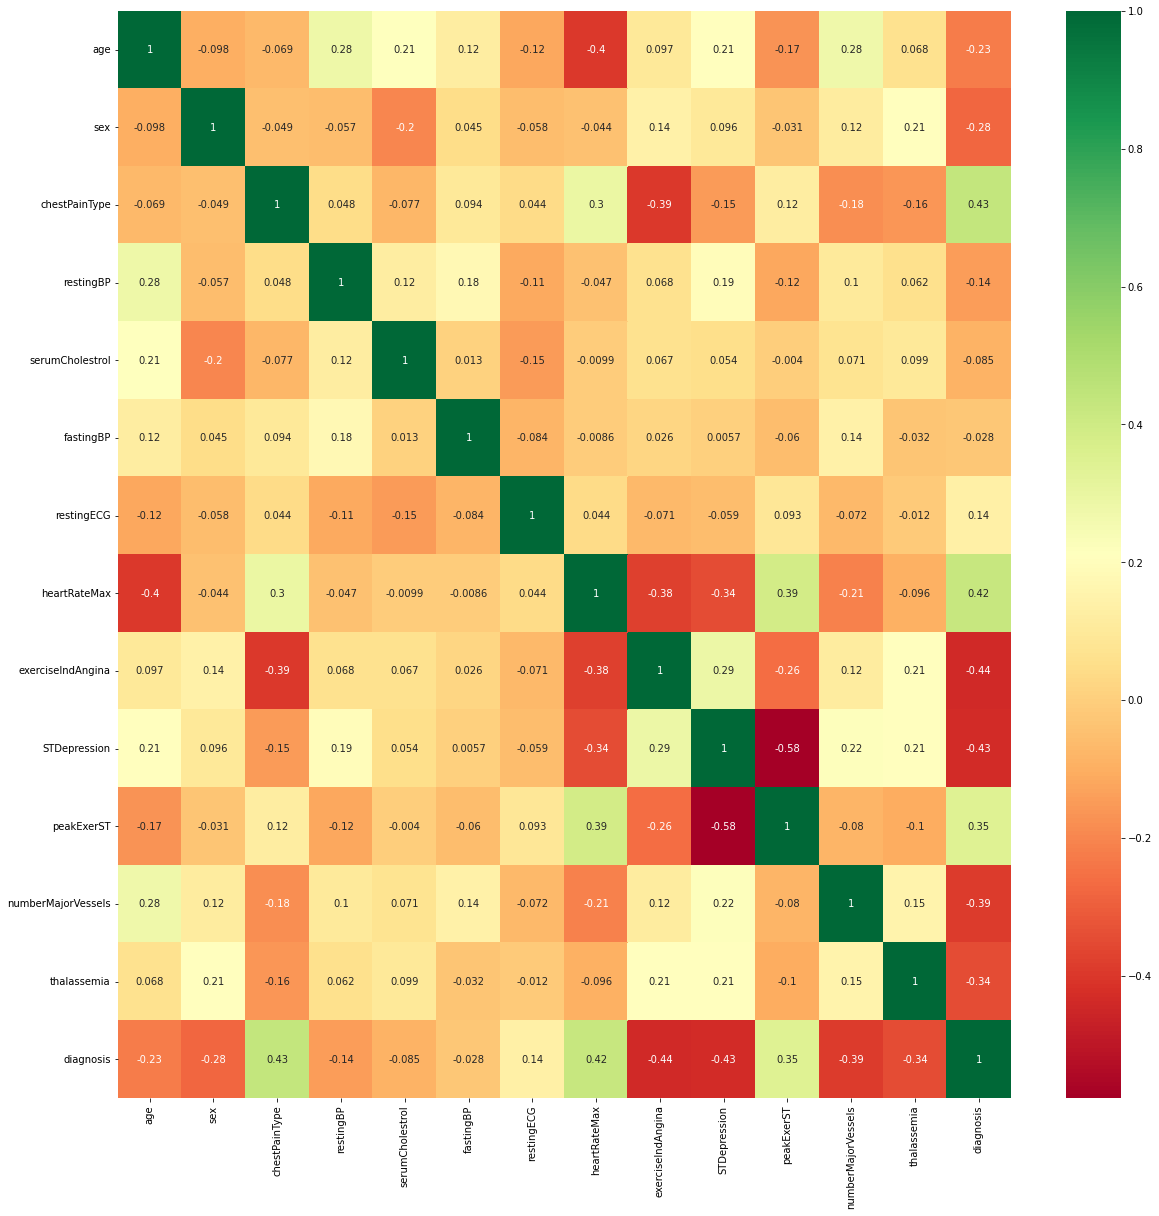

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
X = df.iloc[:,:-1]
y = df['diagnosis']

# Model Building and Training/Testing

In [14]:
def classifiers(classifier, X, y, test_size):

  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size, random_state = None)

  if classifier == 'gnb' or classifier == 'gaussian_naivebayes':    
    gaussain_naivebayes = GaussianNB()
    gaussain_naivebayes.fit(X_train, y_train)
    y_pred_gnb = gaussain_naivebayes.predict(X_test)

    print('Gaussian Naive Bayes classification report for test size',  test_size)
    print(classification_report(y_test, y_pred_gnb))
    print('Accuracy Achieved:', accuracy_score(y_test, y_pred_gnb) * 100)

    print('\n\nGaussian Naive Bayes Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='g', cmap='Blues')

  elif classifier == 'svm':
    svm = LinearSVC()
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)

    print('SVM classification report for test size',  test_size)
    print(classification_report(y_test, y_pred_svm))
    print('Accuracy Achieved:', accuracy_score(y_test, y_pred_svm) * 100)
  
    print('\n\nSVM Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='g', cmap='Blues')

  elif classifier == 'lr':   
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    y_pred_lr = clf.predict(X_test)
    
    print('Logistic Regression classification report for test size',  test_size)
    print(classification_report(y_test, y_pred_lr))
    print('Accuracy Achieved:', accuracy_score(y_test, y_pred_lr) * 100)

    print('\n\nLogistic regression Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test, y_pred_lr),annot=True, fmt='g', cmap='Blues')

  elif classifier == 'xgboost':
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)

    print('XGB classification report for test size',  test_size)
    print(classification_report(y_test, y_pred_xgb))
    print('Accuracy Achieved:', accuracy_score(y_test,y_pred_xgb) * 100)

    print('\n\nXGBoost Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test, y_pred_xgb),annot=True, fmt='g', cmap='Blues')

  elif classifier == 'knn' or classifier == 'KNN':    
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)

    print('KNN classification report for test size',  test_size)
    print(classification_report(y_test,y_pred_knn))
    print('Accuracy Achieved:', accuracy_score(y_test,y_pred_knn) * 100)
    
    print('\n\nKNN Confusion Matrix')
    sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True, fmt='g', cmap='Blues')

# Visualization

Gaussian Naive Bayes classification report for test size 0.2
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87        26
         1.0       0.94      0.86      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy Achieved: 88.52459016393442


Gaussian Naive Bayes Confusion Matrix


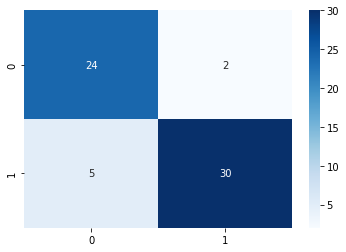

In [15]:
classifiers('gnb', X, y, 0.2)

SVM classification report for test size 0.2
              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81        28
         1.0       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

Accuracy Achieved: 83.60655737704919


SVM Confusion Matrix


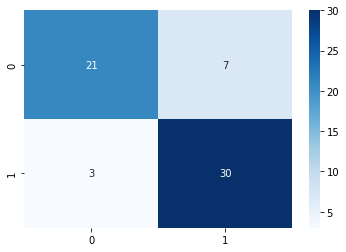

In [16]:
classifiers('svm', X, y, 0.2)

Logistic Regression classification report for test size 0.2
              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        33
         1.0       0.76      1.00      0.86        28

    accuracy                           0.85        61
   macro avg       0.88      0.86      0.85        61
weighted avg       0.89      0.85      0.85        61

Accuracy Achieved: 85.24590163934425


Logistic regression Confusion Matrix


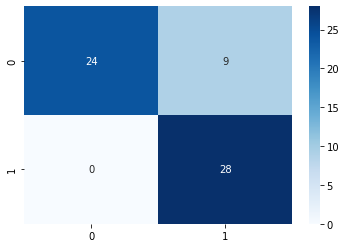

In [33]:
classifiers('lr', X, y, 0.2)

XGB classification report for test size 0.2
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82        26
         1.0       0.86      0.89      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy Achieved: 85.24590163934425


XGBoost Confusion Matrix


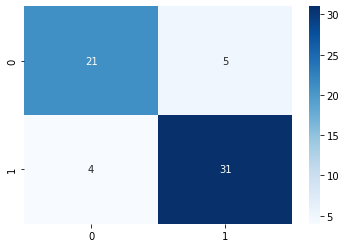

In [29]:
classifiers('xgboost', X, y, 0.2)

#Machine Learning and Neural Net

In [19]:
# Activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def derivativeSigmoid(x):
  return np.exp(-x) / ((np.exp(-x) + 1) ** 2)

In [20]:
data = df.iloc[0:242,:]
data.shape

(242, 14)

In [21]:
data2 = data.T
# shuffle_data = data2[:,np.random.permutation(data2.shape[1])]
data2 = data2.to_numpy()

# Linear Model Perceptron


In [22]:
def linear_model():
  true_predict = 0
  w = np.zeros([14,1])
  bias = np.random.rand(1,1)
  lr = 0.3
  errors = 0
  mse = []
  epochs = 100
  for epoch in range(0,epochs):
    shuffle_data = data2[:,np.random.permutation(data2.shape[1])]
    true_predict = 0
    errors = 0 
    e = np.zeros((data2.shape[1],1))

    for i in range(0,data2.shape[1]):

      # Merging 1 to training data
      x =  np.vstack((1,shuffle_data[0:13, i].reshape(13,1)))
      
      train_y = shuffle_data[-1,i]
    
      # Activation function applie
      y_hat = np.sign((w.T @ x))
      y2 = -1
      if train_y == 0:
        train_y = y2

      error = train_y - y_hat

      # Collecing error for single epoch
      e[i] = error
      w  = w + (lr * error * x)
      bias = lr * error
      if y_hat ==  train_y:
        
        true_predict += 1
      else :
        errors += 1
    # Finding the mean square error     
    mse.append(np.average(e**2))
    # print('accuracy : '+ str(true_predict/data2.shape[1]))

    
  plt.xlabel('Learning curve')
  plt.title('learning curve')
  plt.ylabel('MSE')
  plt.plot(range(epochs),mse) 

  # Testing 
  true_prediction = 0
  data_test = df.iloc[243:303,:]
  data_test = data_test.to_numpy()
  data_test = data_test.T
  for i in range(data_test.shape[1]):
    test_x =  np.vstack((1,data_test[0:13, i].reshape(13,1)))
    test_y = data_test[-1,i]
    y_hat = np.sign((w.T @ test_x))

    y2 = -1
  
    if test_y == 0:
      test_y = -1
  
    if y_hat ==  test_y:
      true_prediction += 1
  # print(true_prediction)
  print('Perceptron of linear model result')
  print('Testing Accuracy: ' +str(true_prediction/data_test.shape[1] * 100))

# Backward Propagation

In [23]:
def backwardPropagation():
  data = df.iloc[0:242,:]
  layer1_neuron = 50
  layer2_neuron = 50
  layer3_neuron = 50
  layer4_neuron = 50
  training_acc = 0
  eta1 = 0.6
  eta2 = 0.1
  eta3 = 0.09
  eta4 = 0.05
  eta5 = 0.01

  new_output = []

  weight1 = np.random.randn(data.shape[1] - 1,layer1_neuron)
  weight2 = np.random.randn(layer1_neuron,layer2_neuron)
  weight3 = np.random.randn(layer2_neuron,layer3_neuron)
  weight4 = np.random.randn(layer3_neuron,layer4_neuron)
  weight5 = np.random.randn(layer4_neuron,1)

  # initialize bias
  bias1 = np.random.randn(1, layer1_neuron)
  bias2 = np.random.randn(1, layer2_neuron)
  bias3 = np.random.randn(1, layer3_neuron)
  bias4 = np.random.randn(1, layer4_neuron)
  bias5 = np.random.randn(1, 1)

  for i in range(1,10000):
    new_output = []
    if i%50 == 0:
      # print(i,' iteration completed')
      
      shuffled_data = data.iloc[np.random.permutation(data.shape[0]), : ].to_numpy()

      # shuffle_seq = np.random.permutation(data.shape[0])  # numpy array of generated random values
      # shuffled_data = data[shuffle_seq, :]  # randomly select the rows from the train dataset

      inputData = shuffled_data[:, :-1]
      outputData = shuffled_data[:, -1].reshape(inputData.shape[0],1)

      pre1 = np.dot(inputData, weight1) + bias1
      output1 = sigmoid(pre1)
      
      pre2 = np.dot(output1, weight2) + bias2
      output2 = sigmoid(pre2)
      
      pre3 = np.dot(output2, weight3) + bias3
      output3 = sigmoid(pre3)
      
      pre4 = np.dot(output3, weight4) + bias4
      output4 = sigmoid(pre4)
      
      pre5 = np.dot(output4, weight5) + bias5
      output5 = sigmoid(pre5)

      #------------------------------ Feed Forward output ----------------------------
      # print(output5)
      #-----------------------------Back Propagation --------------------------------
      deltaOutput5 = (output5 - outputData) * derivativeSigmoid(pre5)
        
      deltaOutput4 = deltaOutput5.dot(weight5.T) * derivativeSigmoid(pre4)
    
      deltaOutput3 = deltaOutput4.dot(weight4.T) * derivativeSigmoid(pre3)
    
      deltaOutput2 = deltaOutput3.dot(weight3.T) * derivativeSigmoid(pre2)

      deltaOutput1 = deltaOutput2.dot(weight2.T) * derivativeSigmoid(pre1)
    
      N = outputData.size

      
      weight1 -= eta1 * ((inputData.T @ deltaOutput1)/N)
      weight2 -= eta2 * ((output1.T @ deltaOutput2)/N)
      weight3 -= eta3 * ((output2.T @ deltaOutput3)/N)
      weight4 -= eta4 * ((output3.T @ deltaOutput4)/N)
      weight5 -= eta5 * ((output4.T @ deltaOutput5)/N)

      listofweight = [weight1,weight2,weight3,weight4,weight5]
      listofbias = [bias1,bias2,bias3,bias4,bias5]

      for i in output5:
        if i[0] > 0.5:
          new_output.append([1.])
        else:
          new_output.append([0.])
      # new_output = np.array(new_output)
      diff = outputData - new_output
      diff = diff ** 2
      numberofone = (diff==1).sum()
  training_acc  = ((1-(numberofone/outputData.shape[0]))*100)
  print("Training Accuracy ----> ",((1-(numberofone/outputData.shape[0]))*100), "%")

      # return listofweight ,listofbias

  data_test = df.iloc[243:303,:]
  data = data_test.to_numpy()

  inputData = data[:, :-1]
  outputData = data[:, -1].reshape(inputData.shape[0], 1)

  new_output = []


  output1 = sigmoid(np.matmul(inputData, weight1) + bias1)
  output2 = sigmoid(np.matmul(output1, weight2) + bias2)
  output3 = sigmoid(np.matmul(output2, weight3) + bias3)
  output4 = sigmoid(np.matmul(output3, weight4) + bias4)
  output5 = sigmoid(np.matmul(output4, weight5) + bias5)
  # print(output5)

  for i in output5:
    if i[0] > 0.5:
        new_output.append([1.])
    else:
        new_output.append([0.])
  new_output = np.array(new_output)
  diff = outputData - new_output
  diff = diff ** 2
  numberofone = (diff==1).sum()
  print("Testing Accuracy ----> ",((1-(numberofone/outputData.shape[0]))*100), "%")

In [24]:
def neuralNet(algorithm):
   
  if algorithm == 'perceptron' or algorithm == 'linear_model':
    linear_model()  
   
  elif algorithm == 'backwardpropagation' or algorithm == 'bp':
    print('Backward Propagation Results')
    backwardPropagation()

In [25]:
neuralNet('bp')

Backward Propagation Results
Training Accuracy ---->  82.64462809917356 %
Testing Accuracy ---->  81.66666666666667 %


# Linear model perceptron

Perceptron of linear model result
Testing Accuracy: 76.66666666666667


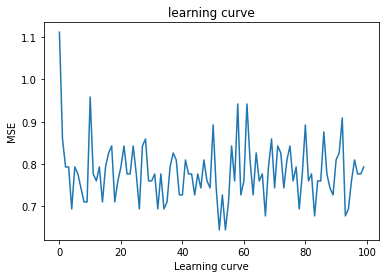

In [26]:
neuralNet('perceptron')